# **The Sparks Foundation Internship - Task 5**
### Author: Muhammad Hammad Hassan
---------------
#### **Objective**
1. Perform EDA on a Indian Premier League dataset
1. As a sports analyst, find out the most successful teams, players and factors contributiong win/loss for a team
1. Suggest Teams/Players a company should endorse for its products
----------------


## 1- Loading Assets

**1.1 - Loading Dependencies**

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.offline as py
from plotly.subplots import make_subplots
from plotly import tools
import matplotlib.pyplot as plt
%matplotlib inline

**1.2 - Loading Dataset**

In [4]:
deliveries = pd.read_csv("/content/deliveries.csv", on_bad_lines='skip')
matches = pd.read_csv('/content/matches.csv')

## 2- Preprocessing

In [5]:
# tO display every column in our dataset and not skip them
pd.set_option('display.max_columns',None)

**2.1- Deliveries Dataset**

In [6]:
deliveries.head(4)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN


In [7]:
print("Deliveries")
print("Rows   | Cols")
print(deliveries.shape[0],"| ", deliveries.shape[1])

Deliveries
Rows   | Cols
179078 |  21


In [8]:
deliveries.dtypes

match_id             int64
inning               int64
batting_team        object
bowling_team        object
over                 int64
ball                 int64
batsman             object
non_striker         object
bowler              object
is_super_over        int64
wide_runs            int64
bye_runs             int64
legbye_runs          int64
noball_runs          int64
penalty_runs         int64
batsman_runs         int64
extra_runs           int64
total_runs           int64
player_dismissed    object
dismissal_kind      object
fielder             object
dtype: object

**2.2- Matches Dataset**

In [9]:
matches.head(4)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN


In [10]:
print("Matches")
print("Rows| Cols")
print(matches.shape[0],"| ", matches.shape[1])

Matches
Rows| Cols
756 |  18


In [11]:
matches.dtypes

id                  int64
season              int64
city               object
date               object
team1              object
team2              object
toss_winner        object
toss_decision      object
result             object
dl_applied          int64
winner             object
win_by_runs         int64
win_by_wickets      int64
player_of_match    object
venue              object
umpire1            object
umpire2            object
umpire3            object
dtype: object

In [12]:
#selected columns
match_selected = matches[['season','team1', 'team2','toss_winner','toss_decision','winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue']]
match_selected.head()

,season,team1,team2,toss_winner,toss_decision,winner,win_by_runs,win_by_wickets,player_of_match,venue
0,2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal"
1,2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium
2,2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium
3,2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium
4,2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium


In [13]:
print('No. of years of Data we have')
match_selected['season'].unique()


No. of years of Data we have


array([2017, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2018,
       2019])

Sorting the dataset by "Season" column

In [14]:
match_selected = match_selected.sort_values('season',ascending=True).reset_index()
match_selected = match_selected.drop(['index'],axis = 1)
match_selected.head()

,season,team1,team2,toss_winner,toss_decision,winner,win_by_runs,win_by_wickets,player_of_match,venue
0,2008,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals,field,Rajasthan Royals,0,3,YK Pathan,Dr DY Patil Sports Academy
1,2008,Chennai Super Kings,Rajasthan Royals,Chennai Super Kings,bat,Rajasthan Royals,0,8,Sohail Tanvir,Sawai Mansingh Stadium
2,2008,Mumbai Indians,Delhi Daredevils,Delhi Daredevils,field,Mumbai Indians,29,0,SM Pollock,Dr DY Patil Sports Academy
3,2008,Kings XI Punjab,Kolkata Knight Riders,Kings XI Punjab,bat,Kings XI Punjab,9,0,IK Pathan,"Punjab Cricket Association Stadium, Mohali"
4,2008,Deccan Chargers,Royal Challengers Bangalore,Deccan Chargers,bat,Royal Challengers Bangalore,0,5,R Vinay Kumar,"Rajiv Gandhi International Stadium, Uppal"


Separating Datasets w.r.t season

In [15]:
df_2008 = match_selected[(match_selected['season']==2008)]
df_2009 = match_selected[(match_selected['season']==2009)]
df_2010 = match_selected[(match_selected['season']==2010)]
df_2011 = match_selected[(match_selected['season']==2011)]
df_2012 = match_selected[(match_selected['season']==2012)]
df_2013 = match_selected[(match_selected['season']==2013)]
df_2014 = match_selected[(match_selected['season']==2014)]
df_2015 = match_selected[(match_selected['season']==2015)]
df_2016 = match_selected[(match_selected['season']==2016)]
df_2017 = match_selected[(match_selected['season']==2017)]
df_2018 = match_selected[(match_selected['season']==2018)]


In [16]:
df_list = [df_2008,df_2009,df_2010,df_2011,df_2012,df_2013,df_2014,df_2015,df_2016,df_2017,df_2018]


In [17]:
count  = 2008
for i in range(len(df_list)):
    print(f'df_{str(count)}.shape --> {df_list[i].shape}')
    count+=1

df_2008.shape --> (58, 10)
df_2009.shape --> (57, 10)
df_2010.shape --> (60, 10)
df_2011.shape --> (73, 10)
df_2012.shape --> (74, 10)
df_2013.shape --> (76, 10)
df_2014.shape --> (60, 10)
df_2015.shape --> (59, 10)
df_2016.shape --> (60, 10)
df_2017.shape --> (59, 10)
df_2018.shape --> (60, 10)


# 3- Analysis of Win/Losses in Toss

Creating a function to add a column to each separate DF which signifies the toss winning team

In [18]:
def returndf(df):
    
    temp = df[(df['toss_winner'])==(df['winner'])]
    return temp

In [19]:
df_2008_toss = returndf(df_2008)
df_2009_toss = returndf(df_2009)
df_2010_toss = returndf(df_2010)
df_2011_toss = returndf(df_2011)
df_2012_toss = returndf(df_2012)
df_2013_toss = returndf(df_2013)
df_2014_toss = returndf(df_2014)
df_2015_toss = returndf(df_2015)
df_2016_toss = returndf(df_2016)
df_2017_toss = returndf(df_2017)
df_2018_toss = returndf(df_2018)

In [20]:
df_2008_toss[['season','team1','team2','toss_winner']].head()


,season,team1,team2,toss_winner
0,2008,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals
3,2008,Kings XI Punjab,Kolkata Knight Riders,Kings XI Punjab
6,2008,Rajasthan Royals,Kolkata Knight Riders,Rajasthan Royals
7,2008,Deccan Chargers,Kings XI Punjab,Kings XI Punjab
10,2008,Chennai Super Kings,Royal Challengers Bangalore,Chennai Super Kings


In [21]:
toss_list = [df_2008_toss,df_2009_toss,df_2010_toss,df_2011_toss,df_2012_toss,df_2013_toss,df_2014_toss,df_2015_toss,
            df_2016_toss,df_2017_toss,df_2018_toss]
shape_list = []
count = 2008
for i in range(len(toss_list)):
    print(f' df_{str(count)}_toss.shape --> {toss_list[i].shape}')
    shape_list.append(toss_list[i].shape[0])
    count+=1

 df_2008_toss.shape --> (28, 10)
 df_2009_toss.shape --> (33, 10)
 df_2010_toss.shape --> (31, 10)
 df_2011_toss.shape --> (38, 10)
 df_2012_toss.shape --> (33, 10)
 df_2013_toss.shape --> (36, 10)
 df_2014_toss.shape --> (30, 10)
 df_2015_toss.shape --> (28, 10)
 df_2016_toss.shape --> (34, 10)
 df_2017_toss.shape --> (34, 10)
 df_2018_toss.shape --> (32, 10)


Creating a separate dataframe for Wins and Seasons

In [22]:
temp = pd.DataFrame()
temp['Season'] = [i for i in range(2008,2019)]
temp['Wins'] = np.array(shape_list)
temp.head()

,Season,Wins
0,2008,28
1,2009,33
2,2010,31
3,2011,38
4,2012,33


Text(0, 0.5, 'Wins')

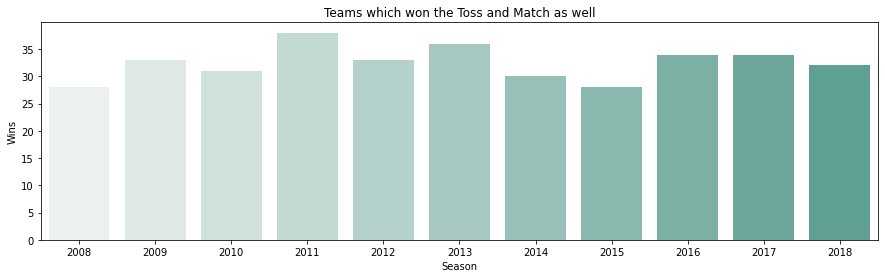

In [23]:
fig = plt.figure(figsize=(15,4))
fig = sns.barplot(data=temp,x = 'Season',y = 'Wins',palette='light:#5A9')
plt.title('Teams which won the Toss and Match as well')
plt.xlabel('Season')
plt.ylabel('Wins')

Conveting the dataframes to dictionary to keep track of winners

In [24]:
def returndict(df):
    values = df['winner'].values
    values = list(values)
    df_val = dict(zip(values,map(values.count,values)))
    key_list = []
    val_list = []
    for key,val in df_val.items():
        key_list.append(key)
        val_list.append(val)
    df = pd.DataFrame()
    df['Team'] = key_list
    df['Wins'] = val_list
    return df

win_2008 = returndict(df_2008)
win_2009 = returndict(df_2009)
win_2010 = returndict(df_2010)
win_2011 = returndict(df_2011)
win_2012 = returndict(df_2012)
win_2013 = returndict(df_2013)
win_2014 = returndict(df_2014)
win_2015 = returndict(df_2015)
win_2016 = returndict(df_2016)
win_2017 = returndict(df_2017)
win_2018 = returndict(df_2018)

Sorting the dictionaries to get the top 3 performers

In [25]:
win_2008_3 = win_2008.sort_values('Wins',ascending=False).head(3)
win_2009_3 = win_2009.sort_values('Wins',ascending=False).head(3)
win_2010_3 = win_2010.sort_values('Wins',ascending=False).head(3)
win_2011_3 = win_2011.sort_values('Wins',ascending=False).head(3)
win_2012_3 = win_2012.sort_values('Wins',ascending=False).head(3)
win_2013_3 = win_2013.sort_values('Wins',ascending=False).head(3)
win_2014_3 = win_2014.sort_values('Wins',ascending=False).head(3)
win_2015_3 = win_2015.sort_values('Wins',ascending=False).head(3)
win_2016_3 = win_2016.sort_values('Wins',ascending=False).head(3)
win_2017_3 = win_2017.sort_values('Wins',ascending=False).head(3)
win_2018_3 = win_2018.sort_values('Wins',ascending=False).head(3)

In [26]:
fig = make_subplots(rows=6,cols=2,subplot_titles=("Successful Teams of Season 2008",
                                                 "Successful Teams of Season 2009",
                                                 "Successful Teams of Season 2010",
                                                 "Successful Teams of Season 2011",
                                                 "Successful Teams of Season 2012",
                                                 "Successful Teams of Season 2013",
                                                 "Successful Teams of Season 2014",
                                                 "Successful Teams of Season 2015",
                                                 "Successful Teams of Season 2016",
                                                 "Successful Teams of Season 2017",
                                                 "Successful Teams of Season 2018"),shared_yaxes=True)
print("="*30)
print("Top 3 performers in each season")
print("="*30)

fig.add_trace(go.Bar(x = win_2008_3['Team'],y = win_2008_3['Wins'],marker = dict(color = win_2008_3['Wins'],coloraxis = "coloraxis")),row = 1,col = 1)
fig.add_trace(go.Bar(x = win_2009_3['Team'],y = win_2009_3['Wins'],marker = dict(color = win_2009_3['Wins'],coloraxis = "coloraxis")),row = 1,col = 2)
fig.add_trace(go.Bar(x = win_2010_3['Team'],y = win_2010_3['Wins'],marker = dict(color = win_2010_3['Wins'],coloraxis = "coloraxis")),row = 2,col = 1)
fig.add_trace(go.Bar(x = win_2011_3['Team'],y = win_2011_3['Wins'],marker = dict(color = win_2011_3['Wins'],coloraxis = "coloraxis")),row = 2,col = 2)
fig.add_trace(go.Bar(x = win_2012_3['Team'],y = win_2012_3['Wins'],marker = dict(color = win_2012_3['Wins'],coloraxis = "coloraxis")),row = 3,col = 1)
fig.add_trace(go.Bar(x = win_2013_3['Team'],y = win_2013_3['Wins'],marker = dict(color = win_2013_3['Wins'],coloraxis = "coloraxis")),row = 3,col = 2)
fig.add_trace(go.Bar(x = win_2014_3['Team'],y = win_2014_3['Wins'],marker = dict(color = win_2014_3['Wins'],coloraxis = "coloraxis")),row = 4,col = 1)
fig.add_trace(go.Bar(x = win_2015_3['Team'],y = win_2015_3['Wins'],marker = dict(color = win_2015_3['Wins'],coloraxis = "coloraxis")),row = 4,col = 2)
fig.add_trace(go.Bar(x = win_2016_3['Team'],y = win_2016_3['Wins'],marker = dict(color = win_2016_3['Wins'],coloraxis = "coloraxis")),row = 5,col = 1)
fig.add_trace(go.Bar(x = win_2017_3['Team'],y = win_2017_3['Wins'],marker = dict(color = win_2017_3['Wins'],coloraxis = "coloraxis")),row = 5,col = 2)
fig.add_trace(go.Bar(x = win_2018_3['Team'],y = win_2018_3['Wins'],marker = dict(color = win_2018_3['Wins'],coloraxis = "coloraxis")),row = 6,col = 1)
fig.update_layout(height =1500,width = 900,title_text = "Successful Teams in IPL from season 2008-2018")
fig.show()

Top 3 performers in each season


For the season **2008**,Rajasthan Royals,Kings XI Punjab,Chennai SuperKings,were the top 3 Performing Teams

For the season **2009**,Delhi DareDevils,Deccan Chargers,Royal Challengers Banglore,were the top 3 Performing Teams

For the season **2010**,Mumbai Indians,Chennai SuperKings,Royal Challengers Banglore,were the top 3 Performing Teams

For the season **2011**,Mumbai Indians,Chennai SuperKings,Royal Challengers Banglore,were the top 3 Performing Teams

For the season **2012**,Kolkata Knight Riders,Delhi DareDevils,Mumbai Indians,were the top 3 Performing Teams

For the season **2013**,Mumbai Indians,Chennai SuperKings,Rajasthan Royals,were the top 3 Performing Teams

For the season **2014**,Kings XI Punjab,Kolkata Knight Riders,Chennai SuperKings,were the top 3 Performing Teams

For the season **2015**,Chennai Super Kings,Mumbai Indians,Royal Challengers Banglore,were the top 3 Performing Teams

For the season **2016**,Surises Hyderabad,Gujarat Lions,Royal Challengers Banglore,were the top 3 Performing Teams

For the season **2017**,Mumbai Indians,Rising Pune Supergaints,Kolkata Knight Riders,were the top 3 Performing Teams

For the season **2018**,Chennai SuperKings,Sunrises Hyderabad,Kolkata Knight Riders,were the top 3 Performing Teams

**COMMENT:**  From our analysis, we found out that _Mumbai Indians,Chennai Super Kings,Royal Challengers Banglore,Kolkata Knight Riders_ were the top 4 teams in terms of performance. Therefore these selected teams are a good selection pool for any sponsor.

# 4- Winning Factor Analysis

merging both datasets

In [51]:
merge = pd.merge(deliveries,matches, left_on='match_id', right_on ='id')
merge.head(3)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN


(array([   0., 1000., 2000., 3000., 4000., 5000., 6000.]),
 <a list of 7 Text major ticklabel objects>)

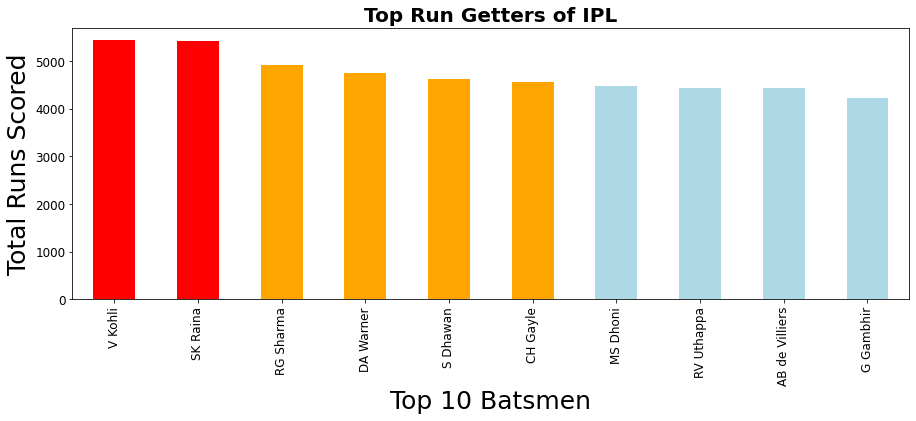

In [73]:
color = ['red','red','orange','orange','orange','orange','lightblue','lightblue','lightblue','lightblue']
merge.groupby('batsman')['batsman_runs'].sum().sort_values(ascending = False).head(10).plot(kind = 'bar', color = color, figsize = (15,5))
plt.title("Top Run Getters of IPL", fontsize = 20, fontweight = 'bold')
plt.xlabel("Top 10 Batsmen", size = 25)
plt.ylabel("Total Runs Scored", size = 25)
plt.xticks(size = 12)
plt.yticks(size = 12)

(array([  0.,  25.,  50.,  75., 100., 125., 150., 175., 200.]),
 <a list of 9 Text major ticklabel objects>)

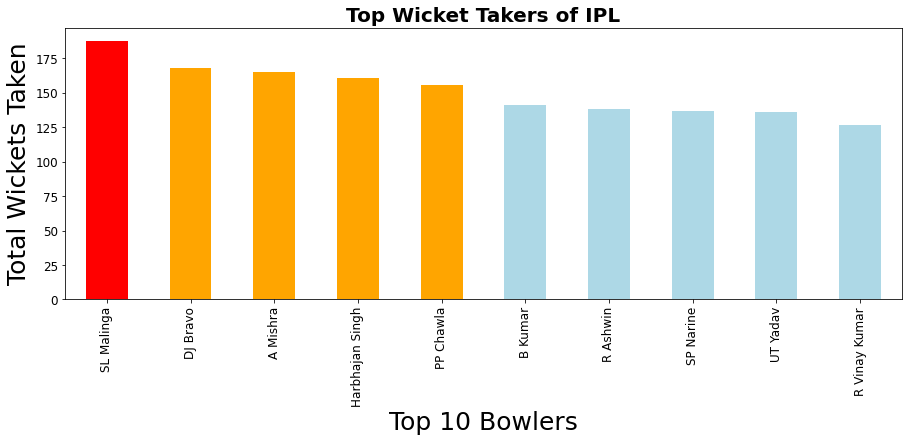

In [72]:
color = ['red','orange','orange','orange','orange','lightblue','lightblue','lightblue','lightblue','lightblue']
merge.groupby('bowler')['player_dismissed'].count().sort_values(ascending = False).head(10).plot(kind = 'bar', 
                                                color = color, figsize = (15,5))
plt.title("Top Wicket Takers of IPL", fontsize = 20, fontweight = 'bold')
plt.xlabel("Top 10 Bowlers", size = 25)
plt.ylabel("Total Wickets Taken", size = 25)
plt.xticks(size = 12)
plt.yticks(size = 12)

 Batsmen Strike Rates

In [68]:
#Only Taking players who have played 10 or more seasons
no_of_balls = pd.DataFrame(merge.groupby('batsman')['ball'].count()) #total number of matches played by each batsman
runs = pd.DataFrame(merge.groupby('batsman')['batsman_runs'].sum()) #total runs of each batsman
seasons = pd.DataFrame(merge.groupby('batsman')['season'].nunique()) #season = 1 implies played only 1 season

batsman_strike_rate = pd.DataFrame({'balls':no_of_balls['ball'],'run':runs['batsman_runs'],'season':seasons['season']})
batsman_strike_rate.reset_index(inplace = True)

batsman_strike_rate['strike_rate'] = batsman_strike_rate['run']/batsman_strike_rate['balls']*100
highest_strike_rate = batsman_strike_rate[batsman_strike_rate.season.isin([10,11])][['season','batsman','strike_rate']].sort_values(by = 'strike_rate',
                                                                                                            ascending = False)

highest_strike_rate.head(10)

,season,batsman,strike_rate
92,11,CH Gayle,145.640370
213,10,KA Pollard,141.751527
112,10,DA Warner,139.523249
444,11,SR Watson,136.945813
72,11,BB McCullum,127.332746
449,10,STR Binny,126.000000
118,11,DJ Bravo,125.565801
514,11,Yuvraj Singh,125.283190
53,10,AT Rayudu,124.058187
147,11,G Gambhir,119.835414


Bowlers With Maximum Extra Balls

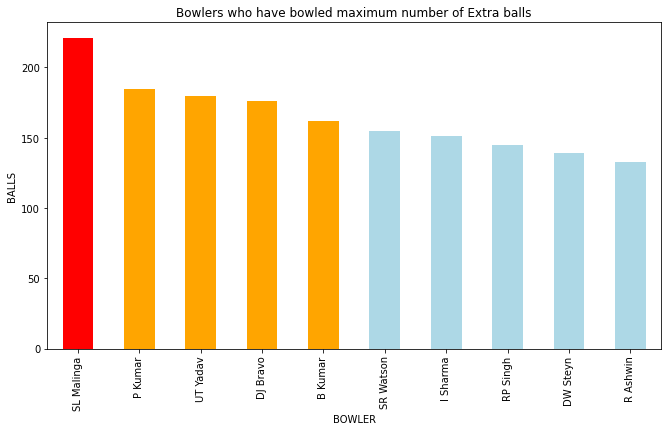

,SL Malinga,P Kumar,UT Yadav,DJ Bravo,B Kumar,SR Watson,I Sharma,RP Singh,DW Steyn,R Ashwin
bowler,221,185,180,176,162,155,151,145,139,133


In [74]:
color = ['red','orange','orange','orange','orange','lightblue','lightblue','lightblue','lightblue','lightblue']
extra = deliveries[deliveries['extra_runs']!=0]['bowler'].value_counts()[:10]
extra.plot(kind='bar', figsize=(11,6), color = color, title='Bowlers who have bowled maximum number of Extra balls')

plt.xlabel('BOWLER')
plt.ylabel('BALLS')
plt.show()

extra = pd.DataFrame(extra)
extra.T

# 5- Summary



*   **Mumbai Indians** were found to be the most consistent winners in the timeframe available in the dataset.
*   They won more matches by chasing(419 matches), rather than defending(350 matches)
*   While chasing, their biggest achievement was that they won by 10 wickets(without losing any). They kept this record 11 times.
*   While defending, their biggest achievement was taht they won by 146 runs, which was when they beat **Dehli Daredevils** by 146 runs.
*   A good selection will from among: **Mumbai Indians**, **Chennai SuperKings**, **Royal Challengers Banglore**
------------
*   **Kohli** and **SK Raina** are the two most outperforming batsmen of IPL
*   **CH Gayle**, **KA Pollard** and **DA Warner** are the top 3 players with highest strike rate.
*   **SL Malinga** and **DJ Bravo** are the top two bowlers in IPL
*   **SL Malinga** is an overall best bowler with an incomparable amount of maximum number extra balls

